Dataset variables info:

Yes = 1, No = 0
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd

In [114]:
data = pd.read_excel('default of credit card clients.xls',header = None, skiprows = 2)

In [115]:
custom_column_names = ['col1', 'col2', 'col3','col4','col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15','col16','col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col123', 'col24', 'col25']
data.columns = custom_column_names


In [116]:
data

col1    col2  col3  col4  col5  col6  col7  col8  col9  col10  ...  \
0          1   20000     2     2     1    24     2     2    -1     -1  ...   
1          2  120000     2     2     2    26    -1     2     0      0  ...   
2          3   90000     2     2     2    34     0     0     0      0  ...   
3          4   50000     2     2     1    37     0     0     0      0  ...   
4          5   50000     1     2     1    57    -1     0    -1      0  ...   
...      ...     ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
29995  29996  220000     1     3     1    39     0     0     0      0  ...   
29996  29997  150000     1     3     2    43    -1    -1    -1     -1  ...   
29997  29998   30000     1     2     2    37     4     3     2     -1  ...   
29998  29999   80000     1     3     1    41     1    -1     0      0  ...   
29999  30000   50000     1     2     1    46     0     0     0      0  ...   

       col16  col17  col18  col19  col20  col21  col22  col123  col24  col25  
0          0      0      0      0    689      0      0       0      0      1  
1       3272   3455   3261      0   1000   1000   1000       0   2000      1  
2      14331  14948  15549   1518   1500   1000   1000    1000   5000      0  
3      28314  28959  29547   2000   2019   1200   1100    1069   1000      0  
4      20940  19146  19131   2000  36681  10000   9000     689    679      0  
...      ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
29995  88004  31237  15980   8500  20000   5003   3047    5000   1000      0  
29996   8979   5190      0   1837   3526   8998    129       0      0      0  
29997  20878  20582  19357      0      0  22000   4200    2000   3100      1  
29998  52774  11855  48944  85900   3409   1178   1926   52964   1804      1  
29999  36535  32428  15313   2078   1800   1430   1000    1000   1000      1  

[30000 rows x 25 columns]

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

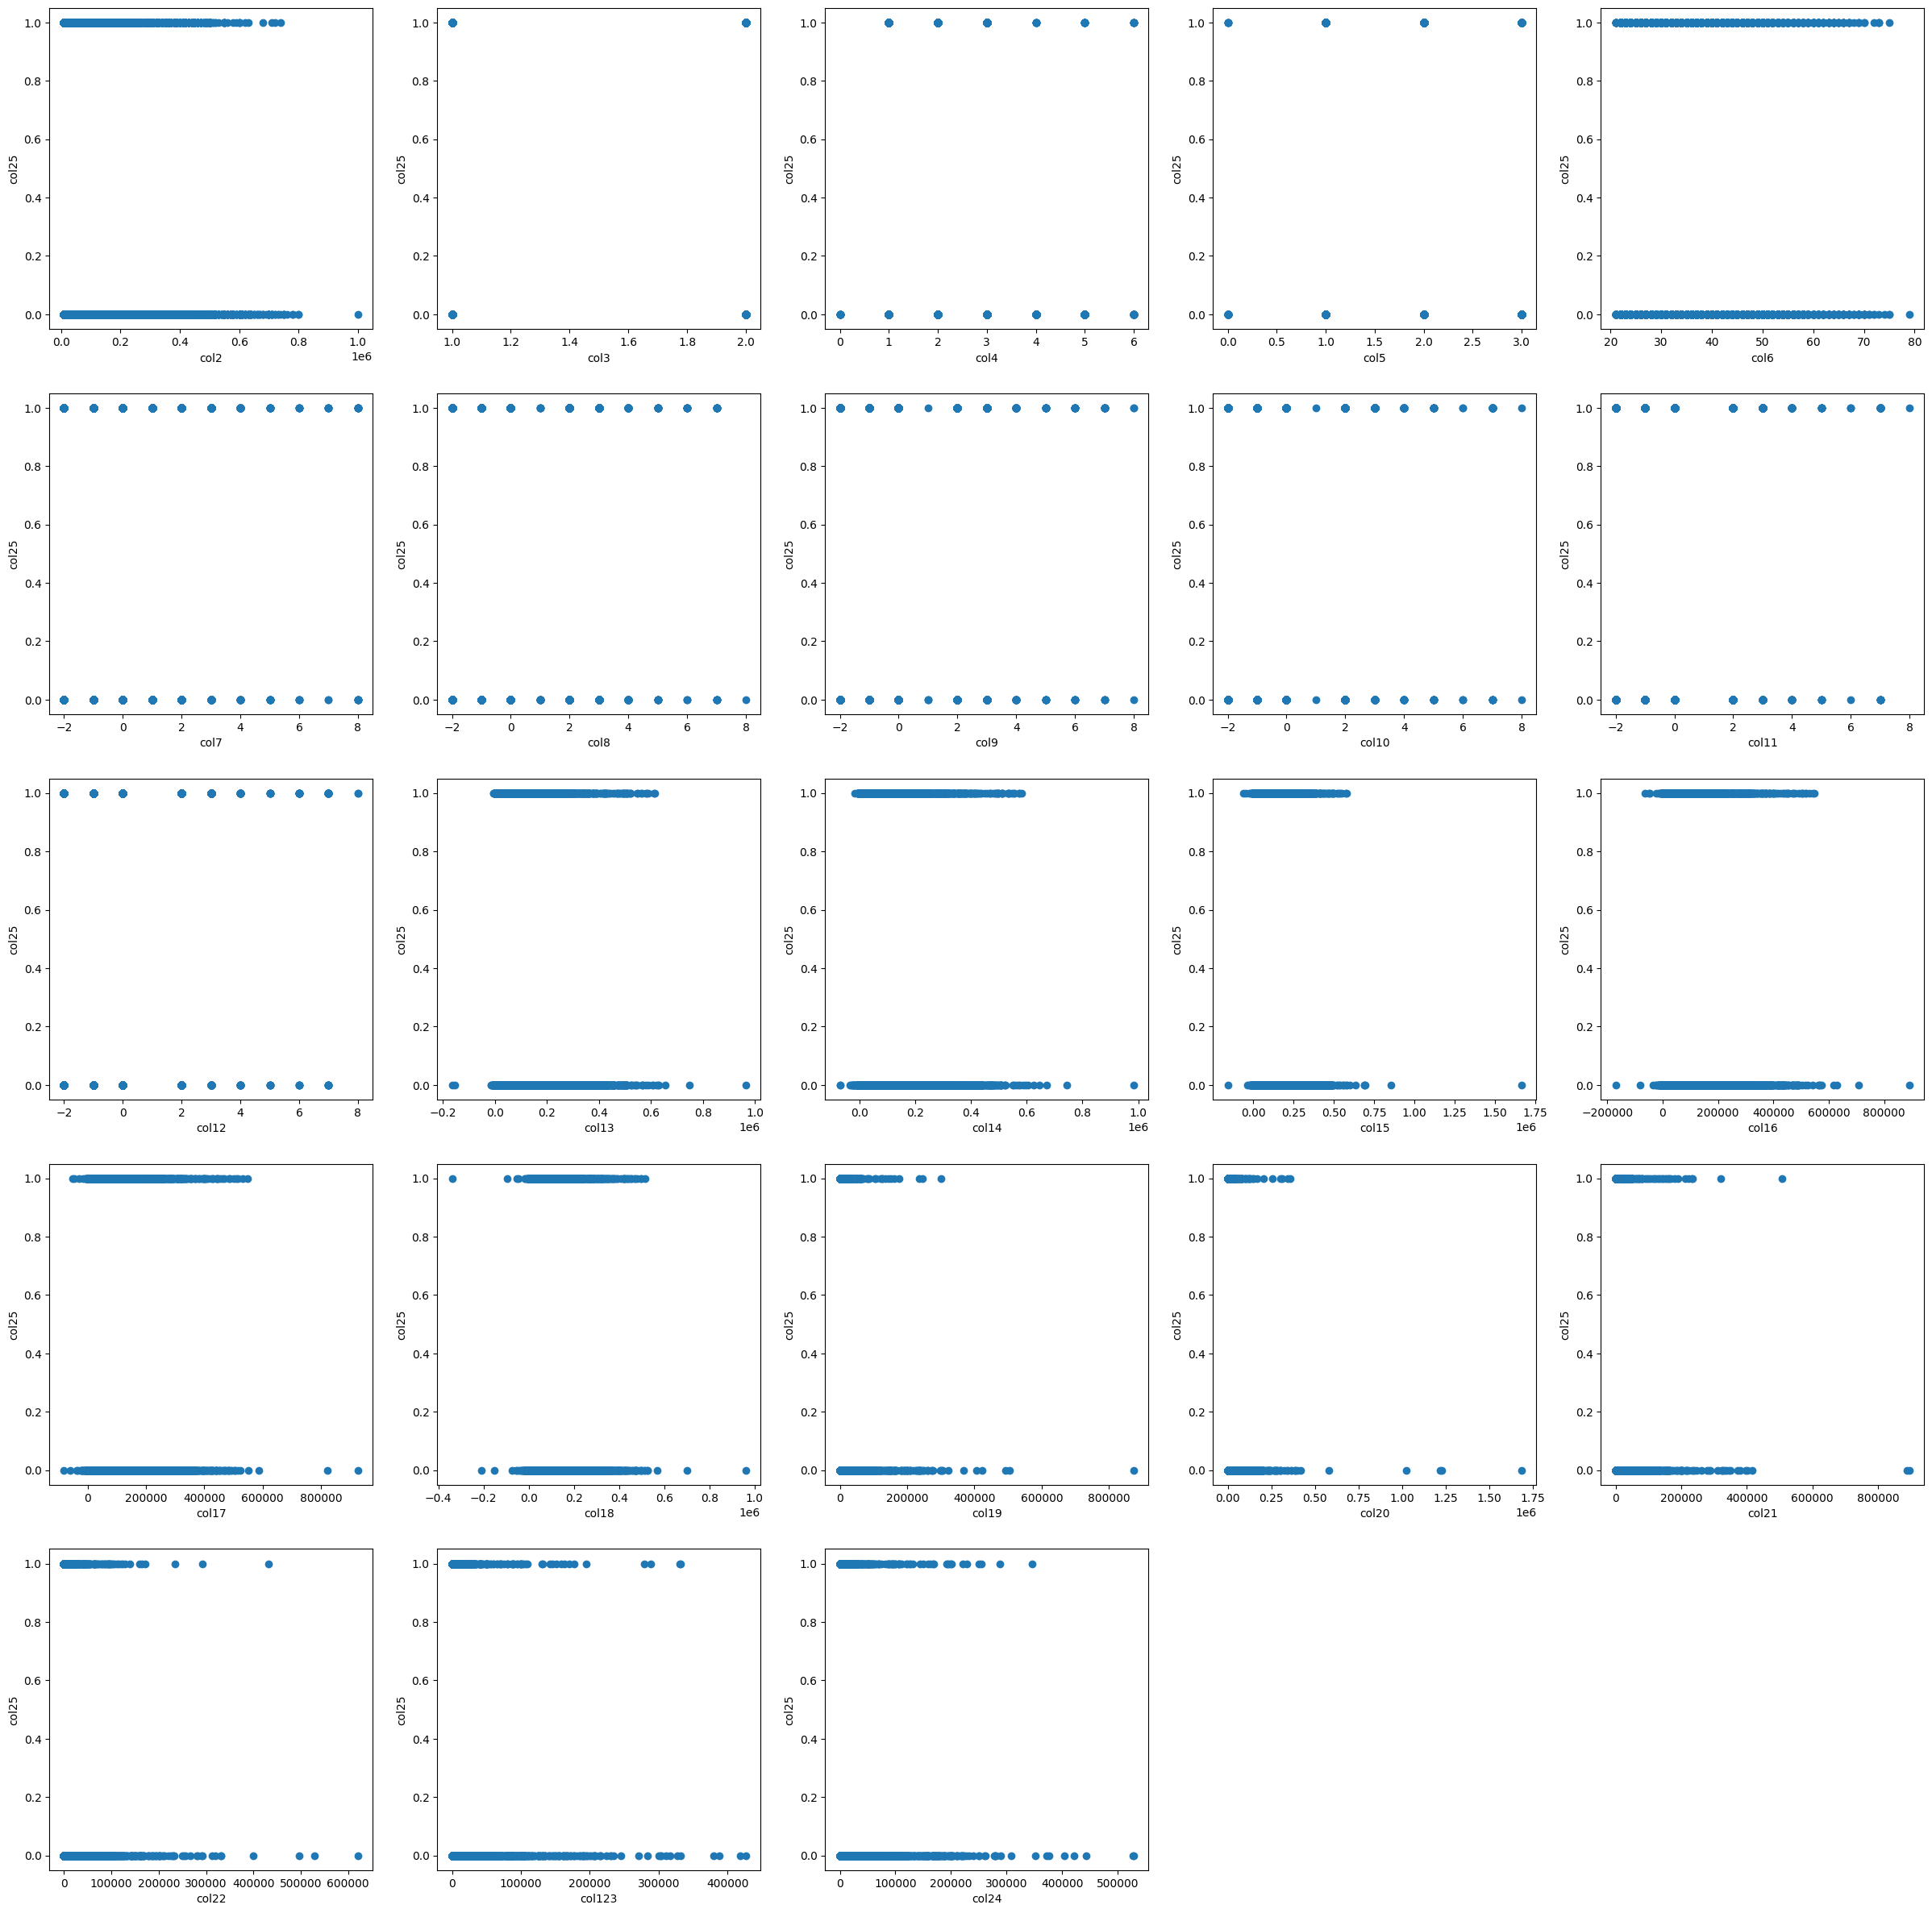

In [117]:
def plot_scatter(cols, label):
    plt.figure(figsize=(30, 30))
    for loc, col in enumerate(cols):
        plt.subplot(5, 5, loc+1)
        plt.scatter(data[col], data[label])
        plt.xlabel(col)
        plt.ylabel(label)
    plt.show()

plot_scatter(data.columns[1:-1].tolist(), "col25")

In [187]:
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

            col1      col2      col3      col4      col5      col6      col7  \
col1    1.000000  0.026179  0.018497  0.039177 -0.029079  0.018678 -0.030575   
col2    0.026179  1.000000  0.024755 -0.219161 -0.108139  0.144713 -0.271214   
col3    0.018497  0.024755  1.000000  0.014232 -0.031389 -0.090874 -0.057643   
col4    0.039177 -0.219161  0.014232  1.000000 -0.143464  0.175061  0.105364   
col5   -0.029079 -0.108139 -0.031389 -0.143464  1.000000 -0.414170  0.019917   
col6    0.018678  0.144713 -0.090874  0.175061 -0.414170  1.000000 -0.039447   
col7   -0.030575 -0.271214 -0.057643  0.105364  0.019917 -0.039447  1.000000   
col8   -0.011215 -0.296382 -0.070771  0.121566  0.024199 -0.050148  0.672164   
col9   -0.018494 -0.286123 -0.066096  0.114025  0.032688 -0.053048  0.574245   
col10  -0.002735 -0.267460 -0.060173  0.108793  0.033122 -0.049722  0.538841   
col11  -0.022199 -0.249411 -0.055064  0.097520  0.035629 -0.053826  0.509426   
col12  -0.020270 -0.235195 -0.044008  0.

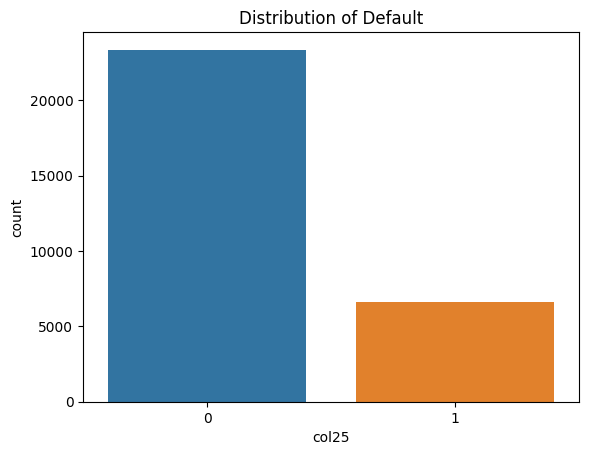

In [118]:
sns.countplot(x='col25', data=data)
plt.title('Distribution of Default')
plt.show()

In [119]:
from sklearn.model_selection  import train_test_split
input = data.drop(['col25', 'col1'], axis = 1)
output = data['col25']
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3)
x_train

col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  ...  \
4207    80000     2     3     1    36    -1    -1    -1     -1     -1  ...   
23231  190000     2     1     2    33    -2    -2    -2     -2     -2  ...   
27381  200000     1     3     3    48    -1    -1    -1     -1      0  ...   
16008   50000     2     1     2    22     0     0     0      0      0  ...   
23595  200000     2     2     1    43     0     0    -2     -1     -1  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
16949   50000     1     2     1    58     2     2     2      2      0  ...   
28884  320000     2     2     1    41    -2    -2    -2     -2     -2  ...   
1907   290000     2     1     2    29    -1    -1    -1     -1     -1  ...   
1097   170000     1     1     1    42     1    -2    -2     -2     -2  ...   
14397   80000     2     1     1    54     2     2     2      0      0  ...   

       col15  col16  col17  col18  col19  col20  col21  col22  col123  col24  
4207    1470   1720   2890   7678   6906   1470   1720   2890    7678   1730  
23231   6036   4238   2907   3122   4031   6045   4247   2907    3122  12419  
27381   3529  11711  38079      0   4780   3529  11726  35000       0      0  
16008  17823  18495  18266  18631   2250   1587   1259    765     773    476  
23595    230   2059      0      0      0    230   2059      0       0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...     ...    ...  
16949  11257  11772  12574  13369   2152   1000   1000   1000    1000   1000  
28884    648   2258    722  15937   7100    651   2269    725   16014   3088  
1907    7620      0   4788      0   7129   7620      0   4788       0   7026  
1097       0      0      0   2485      0      0      0      0    2485   7797  
14397  14909  14915  15382  16374   3084      0    550    707    1400    200  

[21000 rows x 23 columns]

In [ ]:
pip install tensorflow_decision_forests

In [43]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [135]:
test_data = pd.concat([x_train, y_train], axis=1)

In [136]:
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='col25')

In [137]:
model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

Use /tmp/tmpl6hq1fhn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.137483. Found 21000 examples.
Training model...
Model trained in 0:00:23.926964
Compiling model...
Model compiled.


In [125]:
print(model.summary())

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (24):
	col1
	col10
	col11
	col12
	col123
	col13
	col14
	col15
	col16
	col17
	col18
	col19
	col2
	col20
	col21
	col22
	col24
	col3
	col4
	col5
	col6
	col7
	col8
	col9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.   "col7"  0.245544 ################
    2.   "col8"  0.140294 ######
    3.   "col9"  0.118947 ####
    4.  "col19"  0.113234 ###
    5.   "col2"  0.109521 ###
    6.  "col10"  0.108106 ###
    7.  "col20"  0.107858 ###
    8.  "col21"  0.102730 ##
    9.  "col11"  0.100139 ##
   10.  "col13"  0.099400 ##
   11.  "col12"  0.096183 #
   12.  "col22"  0.093546 #
   13. "col

In [138]:
test_data = pd.concat([x_test, y_test], axis=1)

In [139]:
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label = 'col25')

In [186]:
predictions = model.predict(tf_test_dataset)

9/9 [==============================] - 1s 91ms/step


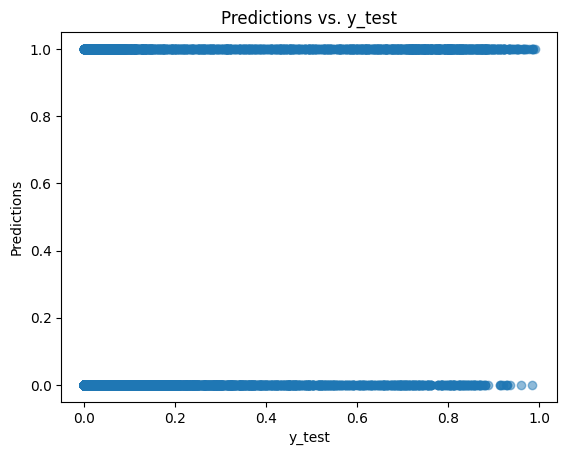

In [180]:
import matplotlib.pyplot as plt
predictions = predictions.flatten()
plt.scatter(predictions, y_test, alpha=0.5)
plt.title('Predictions vs. y_test')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.show()

In [185]:
from sklearn.metrics import accuracy_score
predictions = predictions.flatten()
predictions_binary = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions_binary)
print("Accuracy:", accuracy)

Accuracy: 0.817


Trying removing some features


In [191]:
data.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'col21', 'col22', 'col123', 'col24',
       'col25'],
      dtype='object')

In [ ]:
from sklearn.model_selection  import train_test_split
input = data.drop(['col25', 'col1','col3','col4', 'col5', 'col6', 'col13', 'col14','col15','col16', 'col17', 'col18','col19','col20','col21', 'col22', 'col123', 'col24' ], axis = 1)
output = data['col25']
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3)
x_train

In [193]:
test_data = pd.concat([x_train, y_train], axis=1)

In [194]:
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='col25')

In [195]:
model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

Use /tmp/tmpu3kt7iy0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.629219. Found 21000 examples.
Training model...
Model trained in 0:00:13.593272
Compiling model...
Model compiled.


In [196]:
test_data = pd.concat([x_test, y_test], axis=1)

In [197]:
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label = 'col25')

In [198]:
predictions = model.predict(tf_test_dataset)

9/9 [==============================] - 1s 79ms/step


In [199]:
from sklearn.metrics import accuracy_score
predictions = predictions.flatten()
predictions_binary = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions_binary)
print("Accuracy:", accuracy)

Accuracy: 0.8174444444444444
